Total Data =  7963
Total Data Above Criteria =  6284
Total Positive Contradiction =  1522
Total Data Below Criteria =  1682
Total Negative Contradiction =  188

Total Data Above Criteria (NE) =  5340
Total Positive Contradiction (NE) =  1512
Total Data Below Criteria (NE) =  1504
Total Negative Contradiction  (NE) =  10

Total Data Above Criteria (OA) =  944
Total Positive Contradiction (OA) =  10
Total Data Below Criteria (OA) =  178
Total Negative Contradiction  (OA) =  178

           Parameter   Positive    Negative
0          Whole (%)  24.220242   11.177170
1      Naked Eye (%)  28.314607    0.664894
2  Optical Aided (%)   1.059322  100.000000


C:\Users\syazw\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


<Figure size 720x432 with 0 Axes>

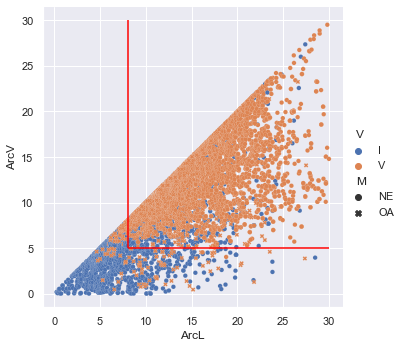

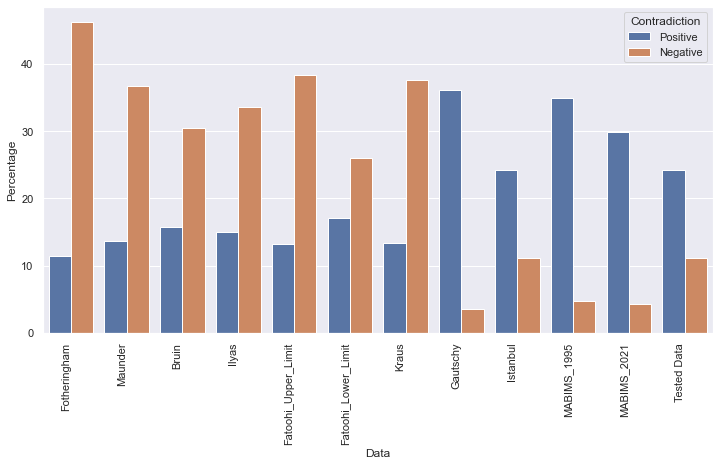

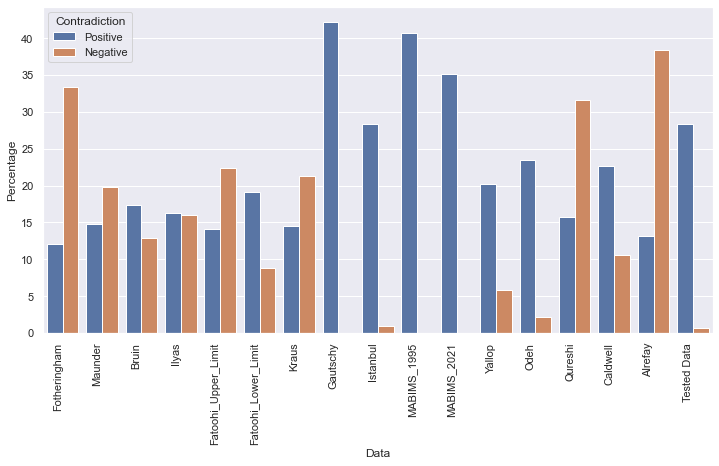

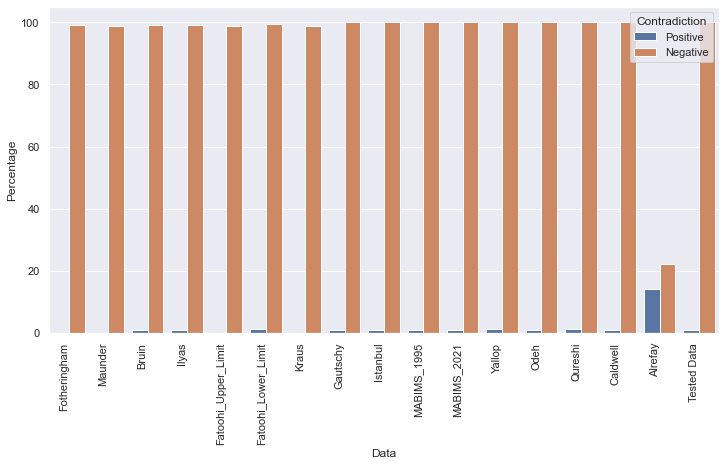

C:\Users\syazw\AppData\Local\Temp\ipykernel_31124\3498450999.py:509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest[a] = dftest[a].abs()
C:\Users\syazw\AppData\Local\Temp\ipykernel_31124\3498450999.py:510: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest[b] = dftest[b].abs()


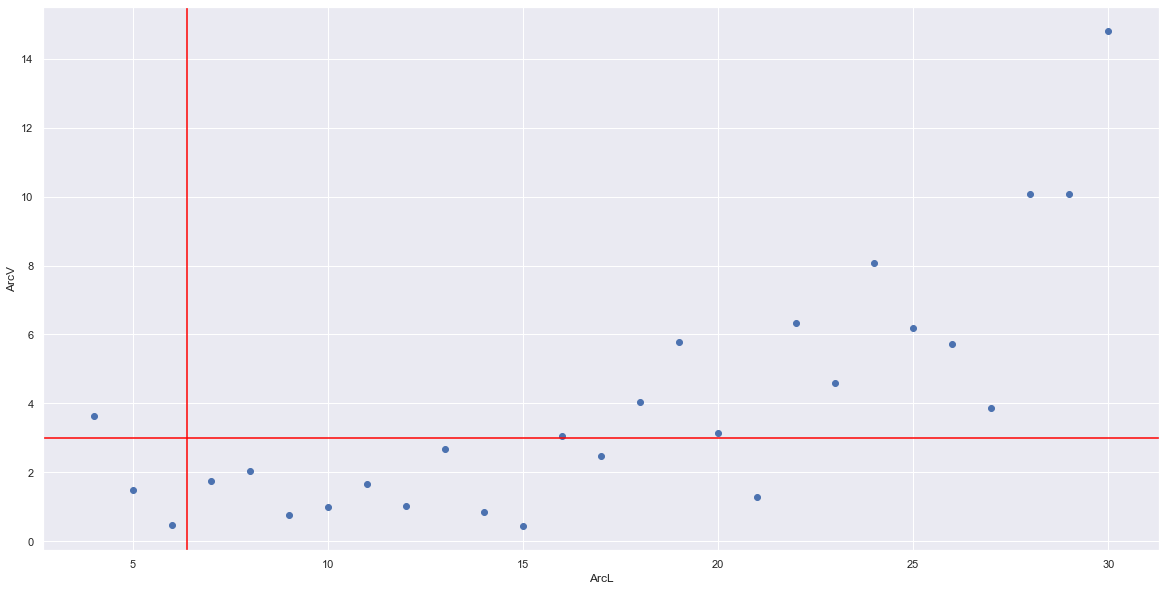

C:\Users\syazw\AppData\Local\Temp\ipykernel_31124\3498450999.py:577: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['mean'] = df.mean(axis=1)


In [94]:

import hilalpy

#output file
poserrorratedata = "C:/Users/syazw/Downloads/poserroratedata.csv"
negerrorratedata = "C:/Users/syazw/Downloads/negerroratedata.csv"
doc_loc ="C:/Users/syazw/Downloads/report.docx"


#input parameter
x = 'ArcL'
y = 'ArcV'
conditionx = 8
conditiony = 5
limitx = 30
limity = 30
dataset = 'Whole'

cond (dataset,doc_loc,negerrorratedata,poserrorratedata,a,b,conditionx,conditiony,limitx,limity)



In [93]:
def cond (dataset,doc_loc,negerrorratedata,poserrorratedata,x,y,conditionx,conditiony,limitx,limity): 
    
    import os,glob, pandas as pd
    import numpy as np  
    import pandas as pd  
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numexpr as ne
    import docx 
    from docx.shared import Inches
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import statistics

    
    
        #Generate into Document
    c,d = x,y
    document = docx.Document()
    document.add_heading('Report of Equation Style Lunar Crescent Visibility Criterion')
    
    #convert all varible to positive.
    path = 'C:/Users/syazw/OneDrive - Universiti Malaya/PhD/References/Source of Moon Sighting Report/Raw Data/Final Data/Final.csv'
    df = pd.read_csv(path, index_col=0)
    df[x] = df[x].abs()
    df[y] = df[y].abs()

    #Set Limit

    df=df[(df[x] <= limitx)]
    df=df[(df[y] <= limity)]

    #Change Style

    sns.set_theme(style="darkgrid")

    #Format Plot for Whole

    plt.figure(figsize=(10,6))
    a=sns.relplot(x=df[x], y=df[y],style=df['M'],hue=df['V'], s=20,linewidth=0.1)

    a.ax.hlines(y=conditiony, xmin=conditionx, xmax=limitx, color='red')
    a.ax.vlines(x=conditionx, ymin=conditiony, ymax=limity, color='red')
    
    a.savefig("EquaErrRate.png")

    
    #Generate into Document
    document.add_picture("EquaErrRate.png")
    paragraph = document.add_paragraph("Figure 1: Tested Criterion Over Data of Lunar Crescent Sighting")


    #Condition Test on Whole
    print ("Total Data = ",len(df))
    
    paragraph = document.add_paragraph("-----------------------------------------------")
    document.add_heading('Contradiction Rate of the Criterion', level=2)
    paragraph = document.add_paragraph("-----------------------------------------------")
    document.add_heading('Contradiction Rate Of Whole Data', level=3)
    
    dfx=df[(df[x] >= conditionx)]
    dfypos=dfx[(dfx[y] >= conditiony)]
    dfy_visible = dfypos[dfypos['V'] =='I']
    df_visible = dfypos[dfypos['V'] =='V']

    #xpos_whole=abs((len(dfypos[x])-len(dfy_visible[x])))
    positive_errorrate_whole = ((len(dfy_visible[x])/(len(dfypos)))*100)
    print ("Total Data Above Criteria = ",len(dfypos))
    
        #Generate Into Document
    total_data_above_criteria = len(dfypos)
    total_data_above_criteria_text = f"Total Data Above Criteria = {total_data_above_criteria}"
    paragraph = document.add_paragraph(total_data_above_criteria_text)
    
    print ("Total Positive Contradiction = ",len(dfy_visible))
    
        #Generate Into Document
    total_positive_contradiction = len(dfy_visible)
    total_positive_contradiction_text = f"Total Positive Contradiction = {total_positive_contradiction}"
    paragraph = document.add_paragraph(total_positive_contradiction_text)



    dfyneg=df[(df[y] <= conditiony) | (df[x] <= conditionx)]
    dfy_invisible = dfyneg[dfyneg['V'] =='V']
    df_invisible = dfyneg[dfyneg['V'] =='I']

    xneg_whole=abs((len(dfyneg[x])-len(dfy_invisible[x])))
    negative_errorrate_whole = abs(((xneg_whole/(len(dfyneg[x])))*100)-100)
    print ("Total Data Below Criteria = ",len(dfyneg))
        #Generate Into Document
    total_data_below_criteria = len(dfyneg)
    total_data_below_criteria_text = f"Total Data Below Criteria = {total_data_below_criteria}"
    paragraph = document.add_paragraph(total_data_below_criteria_text)

    
    
    print ("Total Negative Contradiction = ",len(dfy_invisible))
       #Generate Into Document
    total_negative_contradiction = len(dfy_invisible)
    total_negative_contradiction_text = f"Total Negative Contradiction = {total_negative_contradiction}"
    paragraph = document.add_paragraph(total_negative_contradiction_text)
    print("")
    
    #Combine Dataframe
    dfy_visible.to_csv( poserrorratedata, index=False, encoding='utf-8-sig')
    dfy_invisible.to_csv( negerrorratedata, index=False, encoding='utf-8-sig')


    #Condition Test on Naked Eye

    dfn = df[df['M'] =='NE']


    dfx=dfn[(dfn[x] >= conditionx)]
    dfy=dfx[(dfx[y] >= conditiony)]
    dfy_visible = dfy[dfy['V'] =='I']
    df_visible = dfy[dfy['V'] =='V']
    
        #Generate Into Document
    paragraph = document.add_paragraph("-----------------------------------------------")

    xpos_nakedye=abs((len(dfy[x])-len(dfy_visible[x])))
    positive_errorrate_nakedeye = abs(((abs(len(dfy[x])-len(dfy_visible[x]))/(len(dfy[x])))*100-100))
    print ("Total Data Above Criteria (NE) = ",len(dfy))
    document.add_heading('Contradiction Rate Of Naked Eye (NE) Data', level=3)
    total_data_above_criteria_NE = len(dfy)
    total_data_above_criteria_NE_text = f"Total Data Above Criteria (NE) = {total_data_above_criteria_NE}"
    paragraph = document.add_paragraph(total_data_above_criteria_NE_text)

    
    
    print ("Total Positive Contradiction (NE) = ",len(dfy_visible))  
    total_positive_contradiction_NE = len(dfy_visible)
    total_positive_contradiction_NE_text = f"Total Positive Contradiction (NE) = {total_positive_contradiction_NE}"
    paragraph = document.add_paragraph(total_positive_contradiction_NE_text)


   
    dfy=dfn[(dfn[y] <= conditiony) | (dfn[x] <= conditionx)]
    dfy_invisible = dfy[dfy['V'] =='V']
    df_invisible = dfy[dfy['V'] =='I']


    xneg_nakedeye=abs((len(dfy[x])-len(dfy_invisible[x])))
    negative_errorrate_nakedeye = abs((abs((len(dfy[x])-len(dfy_invisible[x]))/(len(dfy[x])))*100-100))
    print ("Total Data Below Criteria (NE) = ",len(dfy))
        #Generate Into Document
    Total_Data_Below_Criteria_NE = len(dfy)
    Total_Data_Below_Criteria_NE_text = f"Total Data Below Criteria (NE) = {Total_Data_Below_Criteria_NE}"
    paragraph = document.add_paragraph(Total_Data_Below_Criteria_NE_text)
    
    print ("Total Negative Contradiction  (NE) = ",len(dfy_invisible))
        #Generate Into Document
    Total_Negative_Contradiction_NE = len(dfy_invisible)
    Total_Negative_Contradiction_NE_text = f"Total Negative Contradiction  (NE) = {Total_Negative_Contradiction_NE}"
    paragraph = document.add_paragraph(Total_Negative_Contradiction_NE_text)
    
    print("")

    
    #Conditional Test on Optical Aided
    dfb= df[df['M'] =='OA']
    dfx=dfb[(dfb[x] >= conditionx)]
    dfyv=dfx[(dfx[y] >= conditiony)]
    dfy_visible = dfyv[dfyv['V'] =='I']
    df_visible = dfyv[dfyv['V'] =='V']

    print ("Total Data Above Criteria (OA) = ",len(dfyv))
    document.add_heading('Contradiction Rate Of Optical Aided (OA) Data', level=3)
    Total_Data_Above_Criteria_OA = len(dfyv)
    Total_Data_Above_Criteria_OA_text = f"Total Data Above Criteria (OA) = {Total_Data_Above_Criteria_OA}"
    paragraph = document.add_paragraph(Total_Data_Above_Criteria_OA_text)
    

    
    print ("Total Positive Contradiction (OA) = ",len(dfy_visible))
    Total_Positive_Contradiction_OA = len(dfy_visible)
    Total_Positive_Contradiction_OA_text = f"Total Positive Contradiction (OA) = {Total_Positive_Contradiction_OA}"
    paragraph = document.add_paragraph(Total_Positive_Contradiction_OA_text)
    
    if len(dfyv)==0 and len(dfy_visible) == 0:
        positive_errorrate_opticalaided = "No data below criterion"
    else:    
        xpos_opticalaided=abs((len(dfb[x])-len(dfy_visible[x])))
        positive_errorrate_opticalaided = abs(((abs(len(dfyv[x])-len(dfy_visible[x]))/(len(dfyv[x])))*100-100))

    
  
    dfyi=dfb[(dfb[y] <= conditiony) |(dfb[x] <= conditionx)]
    dfy_invisible = dfyi[dfyi['V'] =='V']
    df_invisible = dfyi[dfyi['V'] =='I']

    #def negative_errorrate(n, d):
    #    return ((d-n)/n) if n else 0
    
    print ("Total Data Below Criteria (OA) = ",len(dfyi))
    Total_Data_Below_Criteria_OA = len(dfyi)
    Total_Data_Below_Criteria_OA_text = f"Total Data Below Criteria (OA) = {Total_Data_Below_Criteria_OA}"
    paragraph = document.add_paragraph(Total_Data_Below_Criteria_OA_text)
    
    print ("Total Negative Contradiction  (OA) = ",len(dfy_invisible))
    Total_Negative_Contradiction_OA = len(dfy_invisible)
    Total_Negative_Contradiction_OA_text = f"Total Negative Contradiction  (OA) = {Total_Negative_Contradiction_OA}"
    paragraph = document.add_paragraph(Total_Negative_Contradiction_OA_text)
    
    print("") 
    paragraph = document.add_paragraph("-----------------------------------------------")
    document.add_heading('Contradiction Rate Summary in Percentage', level=3)
    
    
    if len(dfyi)==0 and len(dfy_invisible) == 0:
        negative_errorrate_opticalaided = 0
    else:
        #xneg_opticalaided=abs((len(dfb[x])-len(dfy_invisible[x])))
        negative_errorrate_opticalaided = len(dfy_invisible[x])/len(dfyi[x])*100
   

    #Error Rate Combine
    df = pd.merge(dfy_visible, df_visible, how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
    dfccd = df[df['I'] =='CCD']
    dfNU = df[df['I'] =='NU']
    dfT = df[df['I'] =='T']

    condition_test_result = {'Parameter': ['Whole (%)','Naked Eye (%)','Optical Aided (%)'],
            'Positive': [positive_errorrate_whole,positive_errorrate_nakedeye,positive_errorrate_opticalaided],
            'Negative': [negative_errorrate_whole,negative_errorrate_nakedeye,negative_errorrate_opticalaided]
                            }
    df_cond_result = pd.DataFrame(condition_test_result, columns = ['Parameter', 'Positive','Negative'])
    df=df_cond_result.round(2)
    #print(a)
 
        #Document Generation
    t = document.add_table(df.shape[0]+1, df.shape[1])
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
    paragraph = document.add_paragraph("-----------------------------------------------")
    print (df_cond_result)

    #df.to_csv( errorratetotal, index=False, encoding='utf-8-sig')
    
 #Whole General Ranking Determination
    document.add_heading('Comparison of the Tested Criterion Against other Criterion', level=2)
    paragraph = document.add_paragraph("Ranking for general contradiction is based on the mean percentage value of both positive and negative contradiction of a criterion")

    document.add_heading('Whole Contradiction Percentage', level=3)

    #url2 = 'https://raw.githubusercontent.com/msyazwanfaid/hilalpy/main/whole_panda.csv'
    path2='C:/Users/syazw/OneDrive - Universiti Malaya/PhD/PhD Methodology Updated/Dashboard/Whole_2.csv'
    df_whole = pd.read_csv(path2)
    df1 = pd.DataFrame({
        "Contradiction": ["Positive", "Negative"],
        "Data": ["Tested Data","Tested Data"],
        "Percentage" : [positive_errorrate_whole,negative_errorrate_whole]
        })
    df_whole_new=pd.concat([df_whole, df1])
    df_whole_new=df_whole_new.round(2)
    
    #Whole Bar Plot
    plt.figure(figsize=(12, 6))
    chart = sns.barplot(x=df_whole_new.Data, y=df_whole_new.Percentage,
                        hue=df_whole_new.Contradiction)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.show()
    chart.figure.savefig("WholeBarPlot.png",bbox_inches='tight')
    
    #Generate into Document
    document.add_picture("WholeBarPlot.png",width=Inches(6), height=Inches(3))
    paragraph = document.add_paragraph("Figure 2: Comparison of Whole Contradiction Rate for Tested Criterion against other Criterion")


    #Ranking for Whole Contradiction

    result_df = pd.DataFrame(columns=['Result_1', 'Result_2'])
    df_whole_ranking = df_whole_new[['Percentage', 'Data']]
    
    y = df_whole_ranking.Percentage.values
    v = pd.DataFrame({'Data' : df_whole_ranking.Data.values[::2], 'Percentage' : y[::2] + y[1::2]})    
    v['Percentage'] = v['Percentage'].div(2).round(2)   
    df_whole_ranked = v.sort_values('Percentage')
    df_whole_ranked.insert(0, 'Ranking', range(1, 1 + len(df_whole_ranked)))
    df=df_whole_ranked
    
    df_whole_new = df_whole_new.pivot(index='Data', columns='Contradiction', values='Percentage')
    df_whole_new.columns = ['Negative Contradiction', 'Positive Contradiction']
    df = df.merge(df_whole_new, on='Data', how='outer')
    df = df.rename(columns={'Percentage': 'Mean Percentage'})


    
    t = document.add_table(df.shape[0]+1, df.shape[1])
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
            
    #Naked Eye General Ranking Determination

    document.add_heading('Naked Eye General Contradiction Percentage', level=3)
    path2='C:/Users/syazw/OneDrive - Universiti Malaya/PhD/PhD Methodology Updated/Dashboard/Naked_Eye.csv'
    df_calendar = pd.read_csv(path2)
    df1 = pd.DataFrame({
        "Contradiction": ["Positive", "Negative"],
        "Data": ["Tested Data","Tested Data"],
        "Percentage" : [positive_errorrate_nakedeye,negative_errorrate_nakedeye]
        })
    df_general_ne=pd.concat([df_calendar, df1])
    df_general_ne=df_general_ne.round(2)
    df_general_ne_rnk=df_general_ne.round(2)
        
        #Naked Eye Bar Plot
    plt.figure(figsize=(12, 6))
    chart = sns.barplot(x=df_general_ne.Data, y=df_general_ne.Percentage,
                        hue=df_general_ne.Contradiction)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.show()
    chart.figure.savefig("NakedEyeBarPlot.png",bbox_inches='tight')
    
        #Generate into Document
    document.add_picture("NakedEyeBarPlot.png",width=Inches(6), height=Inches(3))
    paragraph = document.add_paragraph("Figure 3: Comparison of Naked Eye Contradiction Rate for Tested Criterion against other Criterion")
    
        #Naked Eye General Ranking Determination
    
    result_df = pd.DataFrame(columns=['Result_1', 'Result_2'])
    df_generalne_ranking = df_general_ne[['Percentage', 'Data']]
    
    y = df_generalne_ranking.Percentage.values
    v = pd.DataFrame({'Data' : df_generalne_ranking.Data.values[::2], 'Percentage' : y[::2] + y[1::2]})    
    v['Percentage'] = v['Percentage'].div(2).round(2)   
    df_ne_ranked = v.sort_values('Percentage')
    df_ne_ranked.insert(0, 'Ranking', range(1, 1 + len(df_ne_ranked)))
    df=df_ne_ranked
    
    df_general_ne2 = df_general_ne_rnk.pivot(index='Data', columns='Contradiction', values='Percentage')
    df_general_ne2.columns = ['Negative Contradiction', 'Positive Contradiction']
    df = df.merge(df_general_ne2, on='Data', how='outer')
    df = df.rename(columns={'Percentage': 'Mean Percentage'})
        
    
    t = document.add_table(df.shape[0]+1, df.shape[1])
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
            
    #Optical Aided General Ranking Determination

    document.add_heading('Optical Aided General Contradiction Percentage', level=3)
    path2='C:/Users/syazw/OneDrive - Universiti Malaya/PhD/PhD Methodology Updated/Dashboard/Optical_Aided.csv'
    df_calendar = pd.read_csv(path2)
    df1 = pd.DataFrame({
        "Contradiction": ["Positive", "Negative"],
        "Data": ["Tested Data","Tested Data"],
        "Percentage" : [positive_errorrate_opticalaided,negative_errorrate_opticalaided]
        })
    df_general_oa=pd.concat([df_calendar, df1])
    df_general_oa=df_general_oa.round(2)
    df_general_oa_rnk=df_general_oa


        #Optical Aided Bar Plot
    plt.figure(figsize=(12, 6))
    chart = sns.barplot(x=df_general_oa.Data, y=df_general_oa.Percentage,
                        hue=df_general_oa.Contradiction)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.show()
    chart.figure.savefig("OpticalAidedBarPlot.png",bbox_inches='tight')
    document.add_picture("OpticalAidedBarPlot.png",width=Inches(6), height=Inches(3))
    paragraph = document.add_paragraph("Figure 4: Comparison of Optical Aided Contradiction Rate for Tested Criterion against other Criterion")

        #Optical Aided General Ranking Determination
    result_df = pd.DataFrame(columns=['Result_1', 'Result_2'])
    df_generaloa_ranking = df_general_oa[['Percentage', 'Data']]
    
    y = df_generaloa_ranking.Percentage.values
    v = pd.DataFrame({'Data' : df_generaloa_ranking.Data.values[::2], 'Percentage' : y[::2] + y[1::2]})    
    v['Percentage'] = v['Percentage'].div(2).round(2)   
    df_oa_ranked = v.sort_values('Percentage')
    df_oa_ranked.insert(0, 'Ranking', range(1, 1 + len(df_oa_ranked)))
    df=df_oa_ranked
    
    df_general_oa2 = df_general_oa_rnk.pivot(index='Data', columns='Contradiction', values='Percentage')
    df_general_oa2.columns = ['Negative Contradiction', 'Positive Contradiction']
    df = df.merge(df_general_oa2, on='Data', how='outer')
    df = df.rename(columns={'Percentage': 'Mean Percentage'})
    
    t = document.add_table(df.shape[0]+1, df.shape[1])
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
   

    #Calendrical Purpose Ranking Naked Eye
    document.add_heading('Comparison of the Tested Criterion Against other Criterion (For Calendrical Purposes)', level=2)
    paragraph = document.add_paragraph("Ranking for calendrical based criterion is based on percentage of negative contradiction. The lower is better.")
    document.add_heading('Calendrical Purposed for Naked Eye', level=3)


    
    #Ranking for Naked Eye Calendrical Contradiction


    result_df = pd.DataFrame(columns=['Result_1', 'Result_2'])
    df_general_ne1 = df_general_ne[df_general_ne["Contradiction"].str.contains("Positive") == False]
    df_calendar_ne = df_general_ne1[['Percentage', 'Data']]
    
     
    df_calendarne_ranked = df_calendar_ne.sort_values('Percentage')
    df_calendarne_ranked.insert(0, 'Ranking', range(1, 1 + len(df_calendarne_ranked)))
    df=df_calendarne_ranked
    t = document.add_table(df.shape[0]+1, df.shape[1])
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
            
    paragraph = document.add_paragraph("-----------------------------------------------")

            
    #Calendrical Purpose Ranking Optical Aided
    document.add_heading('Calendrical Purposed for Optical Aided', level=3)
  
        
    #Ranking for Optical Aided Calendrical Contradiction

    result_df = pd.DataFrame(columns=['Result_1', 'Result_2'])
    df_general_oa1 = df_general_oa[df_general_oa["Contradiction"].str.contains("Positive") == False]
    df_calendar_oa = df_general_oa1[['Percentage', 'Data']]
    
     
    df_calendaroa_ranked = df_calendar_oa.sort_values('Percentage')
    df_calendaroa_ranked.insert(0, 'Ranking', range(1, 1 + len(df_calendaroa_ranked)))
    df=df_calendaroa_ranked
    t = document.add_table(df.shape[0]+1, df.shape[1])
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
            
    paragraph = document.add_paragraph("-----------------------------------------------")
    
    #Ranking for Observation Purposed
    document.add_heading('Comparison of the Tested Criterion Against other Criterion (Observation Purposes)', level=2)
    paragraph = document.add_paragraph("Ranking for  criterion is based on percentage of positive contradiction. The lower is better.")
    document.add_heading('Observation Purposed for Naked Eye', level=3)
    
        #Ranking for Naked Eye Calendrical Contradiction


    result_df = pd.DataFrame(columns=['Result_1', 'Result_2'])
    df_general_ne = df_general_ne[df_general_ne["Contradiction"].str.contains("Negative") == False]
    df_calendar_ne = df_general_ne[['Percentage', 'Data']]
    
     
    df_calendarne_ranked = df_calendar_ne.sort_values('Percentage')
    df_calendarne_ranked.insert(0, 'Ranking', range(1, 1 + len(df_calendarne_ranked)))
    df=df_calendarne_ranked
    t = document.add_table(df.shape[0]+1, df.shape[1])
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
            
    document.add_heading('Observation Purposed for Optical Aided', level=3)
    
    result_df = pd.DataFrame(columns=['Result_1', 'Result_2'])
    df_general_oa = df_general_oa[df_general_oa["Contradiction"].str.contains("Negative") == False]
    df_calendar_oa = df_general_oa[['Percentage', 'Data']]
    
     
    df_calendaroa_ranked = df_calendar_oa.sort_values('Percentage')
    df_calendaroa_ranked.insert(0, 'Ranking', range(1, 1 + len(df_calendaroa_ranked)))
    df=df_calendaroa_ranked
    t = document.add_table(df.shape[0]+1, df.shape[1])
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
    
    #Regression Assesment        
    document.add_heading('Criterion Regression Assesment', level=2)
    
        #Resorted the Data
    path = 'C:/Users/syazw/OneDrive - Universiti Malaya/PhD/References/Source of Moon Sighting Report/Raw Data/Final Data/Final.csv'
    df = pd.read_csv(path, index_col=0)
    
    #print(dataset)

        
    dftest = df[df['V'] =='V']
    if dataset == "Whole":
        dftest=dftest
    else:
        dftest = dftest[dftest['M'] ==dataset]
        
    a,b = c,d
    limita, limitb = limitx,limity
    dftest[a] = dftest[a].abs()
    dftest[b] = dftest[b].abs()
    
    dftest = dftest[[a,b,'V','M']]

    df_test_sorted = dftest.sort_values(a)
    df_test_sorted = df_test_sorted[df_test_sorted[a] <= limita]
    df_test_sorted = df_test_sorted[df_test_sorted[b] <= limitb]
    
    
            # Create a Selected DataFrame
    df = df_test_sorted
    min_range = 1
    max_range = limita
    increment = 1
    results = []

    for i in range(min_range, max_range + 1, increment):
        mask = (df[a] >= i) & (df[a] < i + increment)
        subset = df[mask]
        if len(subset) > 0:
            min_b = subset[b].min()
            results.append({'x': f'{i + increment - 1}', 'y': min_b})

    result_df = pd.DataFrame(results)
    df = result_df
    df['x'] = df['x'].astype(np.int64)
            
        
    # Calculate MSE, MAE, R2
    prediction_x = np.array([conditionx  for i in range(len(df))])
    mse_x = mean_squared_error(df['x'], prediction_x)
    mae_x = mean_absolute_error(df['x'], prediction_x)
    r2_x = r2_score(df['x'], prediction_x)

    prediction_y = np.array([conditiony for i in range(len(df))])
    mse_y = mean_squared_error(df['y'], prediction_y)
    mae_y = mean_absolute_error(df['y'], prediction_y)
    r2_y = r2_score(df['y'], prediction_y)

    mse = statistics.mean([mse_x,mse_y])
    mae = statistics.mean([mae_x,mae_y])
    r2 = statistics.mean([r2_x,r2_x])
    
    MAE_text = f"Mean Absolute Error (MAE) = {mae}"
    paragraph = document.add_paragraph(MAE_text)
    MSE_text = f"Mean Squared Error (MSE) = {mse}"
    paragraph = document.add_paragraph(MSE_text)
    R2_text = f"R^2 Score = {r2}"
    paragraph = document.add_paragraph(R2_text)

        # Plot the actual values against the predicted values
    plt.figure(figsize=(20,10))
    chart=plt.scatter(df['x'], df['y'])
    plt.axhline(y=3, color='red')
    plt.axvline(x=6.4, color='red')
    plt.xlabel(a)
    plt.ylabel(b)
    plt.show()

    chart.figure.savefig("RegressionAssesment.png",bbox_inches='tight')
    document.add_picture("RegressionAssesment.png",width=Inches(6), height=Inches(3))
    paragraph = document.add_paragraph("Figure 5: Graph of the Criterion over Minimum Value of Lunar Crescent Data")

        #Regression Ranking
    path3='C:/Users/syazw/OneDrive - Universiti Malaya/PhD/PhD Methodology Updated/Dashboard/Reg_exam1.csv'
    df = pd.read_csv(path3, index_col=0)
    #print(dataset)
    df['mean'] = df.mean(axis=1)
    df.sort_values(by='mean', inplace=True)
    df['Rank'] = range(1, len(df) + 1)
    df.drop(columns='mean', inplace=True)

    
    document.add_heading('Criterion Ranking based on Regression', level=3)

    
    t = document.add_table(df.shape[0]+1, df.shape[1])
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
    #chart.figure.savefig("OpticalAidedBarPlot.png",bbox_inches='tight')
    #document.add_picture("OpticalAidedBarPlot.png",width=Inches(6), height=Inches(3))



    
    
    document.save(doc_loc)


